In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as stats

In [2]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from numpy import *
from scipy.integrate  import quad
import cmath
%matplotlib inline   

In [3]:
#import commands
import subprocess
import sys

In [4]:
print(plt.style.available)
#plt.style.use('seaborn-colorblind')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
import matplotlib as mpl
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4

#mpl.rcParams['xtick.labelsize'] = 50
mpl.rc('text', usetex=True)
#mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

In [6]:
def regions_confidence(df,name="Confiabilidad x1 con x2",name1='x1',pass_1=0.01,name2='x2',pass_2=0.01):
    lim_ini_1 = df[name1].min()
    lim_fin_1 = df[name1].max()
    lim_ini_2 = df[name2].min()
    lim_fin_2 = df[name2].max()
    
    x1_bins = np.arange(lim_ini_1,lim_fin_1,pass_1)
    x2_bins = np.arange(lim_ini_2,lim_fin_2,pass_2)
    #print(x1_bins)
    # Usar pd.cut() para crear etiquetas basadas en las columnas 'mass' y 'lash'
    df['group_1'] = pd.cut(df[name1], bins=x1_bins, labels=x1_bins[:-1], include_lowest=True)
    df['group_2'] = pd.cut(df[name2], bins=x2_bins, labels=x2_bins[:-1], include_lowest=True)
    df['ratio'] = np.exp(-0.5*df['chi'])
    
    indices_maximos = df.groupby(['group_1','group_2'])['ratio'].idxmax()
    indices_maximos = indices_maximos.dropna()
    
    # Accede a las filas completas usando los índices máximos.
    data_maximo = df.loc[indices_maximos]
    indice_max = df['ratio'].idxmax()
    
    # Accede a la fila completa usando el índice.
    best_fit = df.loc[indice_max]
    return data_maximo,best_fit
    
def graficar_confidence(fila_maxima,fm,X_,Y_,Z_,name1='x1',name2='x2',name="Confiabilidad x1 con x2"):
    fig, ax = plt.subplots(figsize=(7.2,6))
    niveles_confianza = [sigma_2_confianza, sigma_1_confianza]
    contour = plt.contour(X_,Y_,Z_,levels=niveles_confianza, colors=[ '#FFFFFF','#FFFFFF'])
    #labels = ['1 sigma', '2 sigma']
    #coordenadas_etiquetas = [(0.5, 0.5), (-0.5, -0.5)]
    #plt.clabel(contour, inline=1, fontsize=10, fmt='%s'%labels)
    plt.clabel(contour, inline=1, fontsize=5)
    im = ax.scatter(fm[name1],fm[name2],c=fm['ratio'],cmap='viridis')
    #ax.set_facecolor('#541352FF')
    fig.colorbar(im)
    plt.scatter(fila_maxima[name1], fila_maxima[name2], c='red', marker='*', s=200, label='Max Exp')
    plt.title(name, size=30)
    plt.ylabel(name2, size=30)
    plt.xlabel(name1, size=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #name_save = name + ".pdf"
    #plt.savefig(name_save)
    plt.show()
    
def graficar(fila_maxima,fm,name1='x1',name2='x2',name="Confiabilidad x1 con x2"):
    fig, ax = plt.subplots(figsize=(10,7))
    #niveles_confianza = [sigma_2_confianza, sigma_1_confianza]
    #contour = plt.contour(X_,Y_,Z_,levels=niveles_confianza, colors=['#91bfdb', '#FFA500'])
    #plt.clabel(contour, inline=1, fontsize=10)
    im = ax.scatter(fm[name1],fm[name2],c=fm['ratio'],cmap='viridis')
    fig.colorbar(im)
    plt.scatter(fila_maxima[name1], fila_maxima[name2], c='red', marker='*', s=200, label='Max Exp')
    plt.title(name, fontsize=18)
    plt.ylabel(name2, fontsize=14)
    plt.xlabel(name1, fontsize=14)
    name_save = name + ".pdf"
    plt.savefig(name_save)
    plt.show()

In [7]:
# Color style for output sample points
de_pts = "#91bfdb" # Diver scan
rn_pts = "#fc8d59" # Random scan
gd_pts = "#ffffbf" # Grid scan
column_names = ['x1', 'x2', 'x3','x4','chi']
df = pd.read_csv("archivo_profile.csv",names=column_names)
df = df.reset_index()
df = df.drop(columns=['index'])
#print(df.head())

grades = 2  # Grados de libertad
sigma_1 = 0.6827
#sigma_1 = 0.7633995091158048
sigma_2 = 0.9545
sigma_1_confianza = stats.chi2.ppf((1-sigma_1), df=2)
sigma_2_confianza = stats.chi2.ppf((1-sigma_2), df=2)
print(sigma_1_confianza)
print(sigma_2_confianza)

0.7633995091158048
0.09313527163266946


In [8]:
def contorno(df_,pass_1=0.01,pass_2=0.01):
    lim_ini_1 = df_['group_1'].min()
    lim_fin_1 = df_['group_1'].max()
    lim_ini_2 = df_['group_2'].min()
    lim_fin_2 = df_['group_2'].max()
    x1_bins = np.arange(lim_ini_1,lim_fin_1,pass_1)
    x2_bins = np.arange(lim_ini_2,lim_fin_2,pass_2)
    X_,Y_ = np.meshgrid(x1_bins,x2_bins)
    '''
    def funcion(x, y, df_obj):
        try:
            objeto = df_obj[df_obj['group_1'] == x]
            objeto = objeto[objeto['group_2'] == y]
            
            valor = objeto['ratio'].values[0]
        except IndexError:
            valor = 0
        return valor
    '''
    
    combinaciones = [(x, y) for y in x2_bins for x in x1_bins]

    # Crea un DataFrame con todas las combinaciones
    combinaciones_df = pd.DataFrame(combinaciones, columns=['group_1', 'group_2'])

    # Realiza una fusión (merge) con el DataFrame original (best1) para obtener los valores de ratio
    resultado_df = pd.merge(combinaciones_df, df_, on=['group_1', 'group_2'], how='left')

    # Llena los valores NaN con 0
    resultado_df['ratio'].fillna(0, inplace=True)

    # Reorganiza los datos en una matriz Z
    Z_ = resultado_df['ratio'].values.reshape(len(x2_bins), len(x1_bins))
    
    return X_,Y_,Z_


In [9]:
pass_1_int = 0.01
pass_2_int = 0.01
best1,dm1 = regions_confidence(df,name="Confiabilidad x1 con x2",name1='x1',name2='x2',pass_1=pass_1_int,pass_2=pass_2_int)

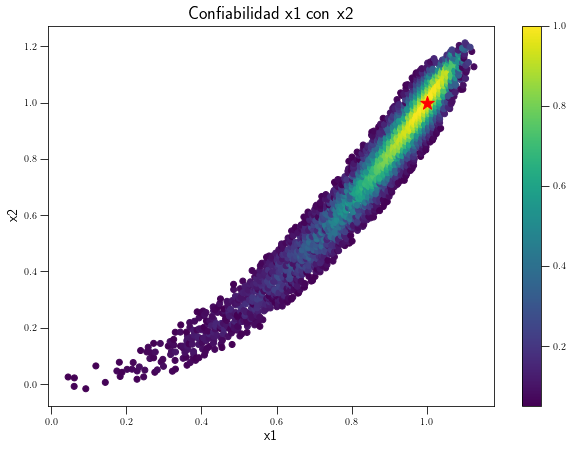

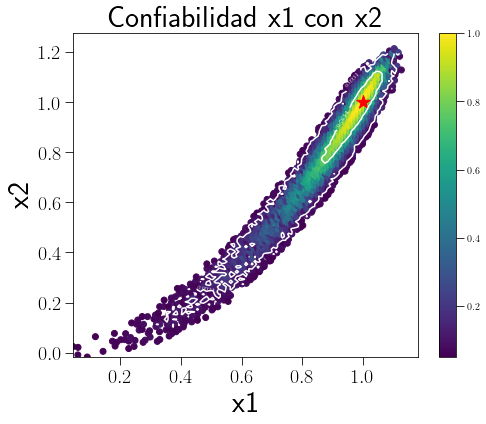

In [10]:
X,Y,Z = contorno(best1)
graficar(dm1,best1,name1='x1',name2='x2',name="Confiabilidad x1 con x2")
graficar_confidence(dm1,best1,X,Y,Z)

In [11]:
def profiling2D(df_,xvar_,yvar_,χvar_,Nx_,Ny_):
    x_ = np.linspace(min(df_[xvar_]), max((df_[xvar_])), Nx_)
    y_ = np.linspace(min(df_[yvar_]), max((df_[yvar_])), Ny_)
    #print(x_)
    dx_ = x_[1] - x_[0]
    dy_ = y_[1] - y_[0]
    midx_ = x_[:-1] + dx_/2
    midy_ = y_[:-1] + dy_/2
    listarr_ = []
    for xpos_ in range(len(x_)-1):
        for ypos_ in range(len(y_)-1):
            tmpdata_ = df_[np.logical_and(np.logical_and(df_[xvar_]>x_[xpos_],df_[xvar_]<x_[xpos_+1]),np.logical_and(df_[yvar_]>y_[ypos_],df_[yvar_]<y_[ypos_+1]))]
            tmplike_ = np.max(tmpdata_[χvar_])
            listarr_.append(([midx_[xpos_],midy_[ypos_],tmplike_]))
    listarr_ = np.asarray(listarr_)         
    return listarr_  

In [12]:
#best1 = best1.reset_index()
#ydata = profiling2D(best1,'x1','x2','ratio',1000,1000)
#ydata
#ydata = np.nan_to_num(ydata, nan=0.0)

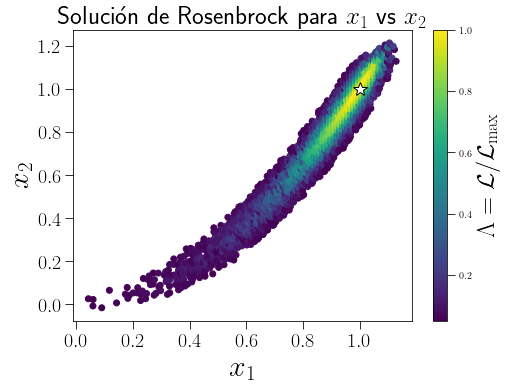

In [33]:
#print(ydata)
#X,Y,Z = contorno(best1)
#profiling2D(best1,'x1','x2','ratio',120,120)
#graficar_confidence(dm1,best1,X,Y,Z)
Lmax = dm1['ratio']
fig, ax = plt.subplots(figsize=(7.2,5.5))
im = ax.scatter(best1['x1'],best1['x2'],c=best1['ratio']/Lmax,cmap='viridis')
c = fig.colorbar(im)
plt.plot(dm1['x1'], dm1['x2'],'w*', markersize=15,markeredgecolor='black')
c.set_label(r'$\Lambda = \mathcal{L}/\mathcal{L}_{\rm max}$',weight='bold',size=25)
plt.title(r'Solución de Rosenbrock para $x_{1}$ vs $x_{2}$',size=25,weight='bold')
plt.xlabel(r'$x_{1}$', size=30, weight='bold')
plt.ylabel(r'$x_{2}$', size=30, weight='bold')
#plt.xlim(-1.5,1.5)
#plt.ylim(-1.5,1.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('x1_vs_x2.png')

In [14]:
pass_1_int = 0.01
pass_2_int = 0.01
best2,dm2 = regions_confidence(df,name="Confiabilidad x2 con x3",name1='x2',name2='x3',pass_1=pass_1_int,pass_2=pass_2_int)

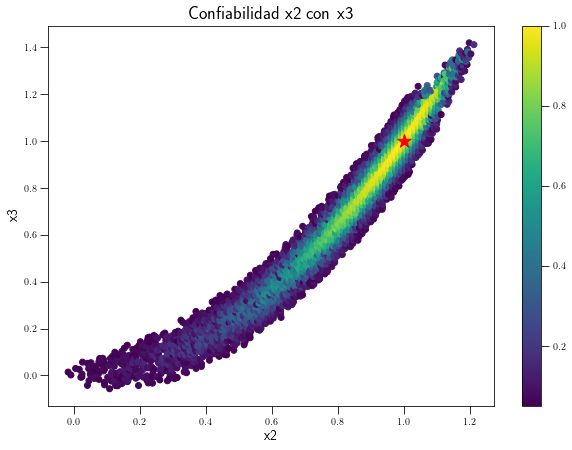

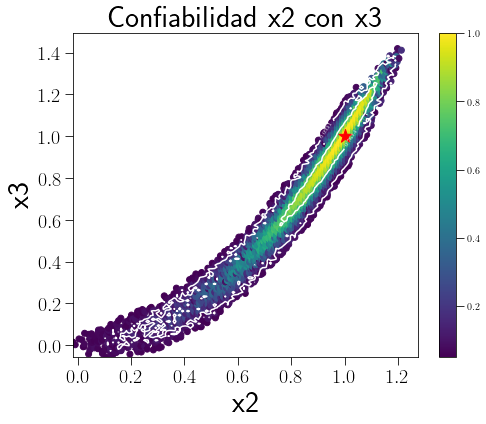

In [15]:
X2,Y2,Z2 = contorno(best2)
graficar(dm2,best2,name1='x2',name2='x3',name="Confiabilidad x2 con x3")
graficar_confidence(dm2,best2,X2,Y2,Z2,name1='x2',name2='x3',name="Confiabilidad x2 con x3")

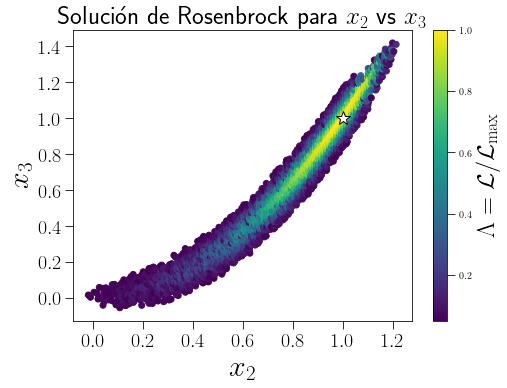

In [34]:
Lmax = dm2['ratio']
fig, ax = plt.subplots(figsize=(7.2,5.5))
im = ax.scatter(best2['x2'],best2['x3'],c=best2['ratio']/Lmax,cmap='viridis')
c = fig.colorbar(im)
plt.plot(dm2['x2'], dm2['x3'],'w*', markersize=15,markeredgecolor='black')
c.set_label(r'$\Lambda = \mathcal{L}/\mathcal{L}_{\rm max}$',weight='bold',size=25)
plt.title(r'Solución de Rosenbrock para $x_{2}$ vs $x_{3}$',size=25,weight='bold')
plt.xlabel(r'$x_{2}$', size=30, weight='bold')
plt.ylabel(r'$x_{3}$', size=30, weight='bold')
#plt.xlim(-1.5,1.5)
#plt.ylim(-1.5,1.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('x2_vs_x3.png')

In [17]:
pass_1_int = 0.01
pass_2_int = 0.01
best3,dm3 = regions_confidence(df,name="Confiabilidad x3 con x4",name1='x3',name2='x4',pass_1=pass_1_int,pass_2=pass_2_int)

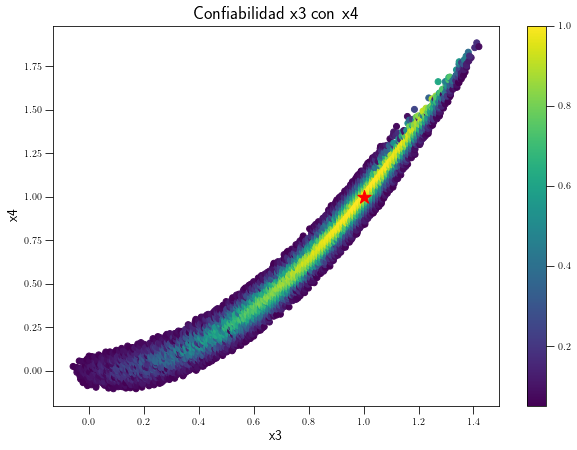

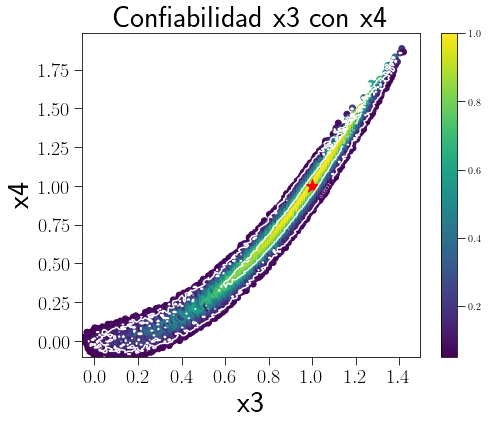

In [28]:
X3,Y3,Z3 = contorno(best3)
graficar(dm3,best3,name1='x3',name2='x4',name="Confiabilidad x3 con x4")
graficar_confidence(dm3,best3,X3,Y3,Z3,name1='x3',name2='x4',name="Confiabilidad x3 con x4")

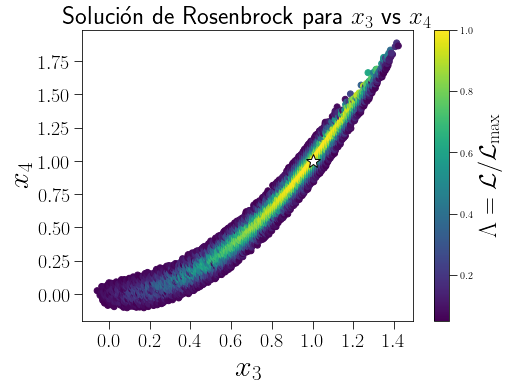

In [35]:
Lmax = dm3['ratio']
fig, ax = plt.subplots(figsize=(7.2,5.5))
im = ax.scatter(best3['x3'],best3['x4'],c=best3['ratio']/Lmax,cmap='viridis')
c = fig.colorbar(im)
plt.plot(dm3['x3'], dm3['x4'],'w*', markersize=15,markeredgecolor='black')
c.set_label(r'$\Lambda = \mathcal{L}/\mathcal{L}_{\rm max}$',weight='bold',size=25)
plt.title(r'Solución de Rosenbrock para $x_{3}$ vs $x_{4}$',size=25,weight='bold')
plt.xlabel(r'$x_{3}$', size=30, weight='bold')
plt.ylabel(r'$x_{4}$', size=30, weight='bold')
#plt.xlim(-1.5,1.5)
#plt.ylim(-1.5,1.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('x3_vs_x4.png')